In [26]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

In [38]:
URL = 'https://en.wikipedia.org/wiki/World_population_estimates'
tables = pd.read_html(URL)
filename = URL
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

In [39]:
un = table2.un / 1e9
un.head()

Year
1950    2.525149
1951    2.572851
1952    2.619292
1953    2.665865
1954    2.713172
Name: un, dtype: float64

In [45]:
census = table2.census / 1e9
census.head()

Year
1950    2.557629
1951    2.594940
1952    2.636772
1953    2.682053
1954    2.730228
Name: census, dtype: float64

In [46]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [47]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [48]:
##Quadratic growth:
def update_func_quad(pop, t, system):
    """Compute the population next year with a quadratic model.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

In [65]:
t_0 = census.index[0]
t_end = census.index[-1]
p_0 = census[t_0]

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

namespace(t_0=1950, t_end=2016, p_0=2.557628654, alpha=0.025, beta=-0.0018)

FileNotFoundError: [Errno 2] No such file or directory: 'figs/chap07-fig01.pdf'

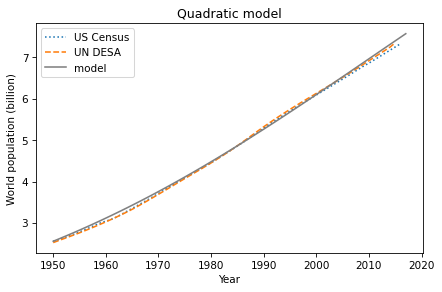

In [70]:
from matplotlib.pyplot import *
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'Quadratic model')
savefig('figs/chap07-fig01.pdf')

In [71]:
##Equilibrium:
pop_array = linspace(0, 15, 100)
net_growth_array = system.alpha * pop_array + system.beta * pop_array**2
None


FileNotFoundError: [Errno 2] No such file or directory: 'figs/chap07-fig02.pdf'

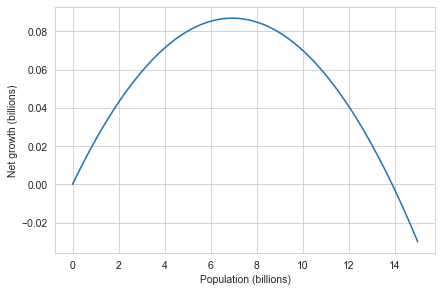

In [73]:
import seaborn as sns
sns.set_style('whitegrid')
plot(pop_array, net_growth_array)
decorate(xlabel='Population (billions)',
         ylabel='Net growth (billions)')

sns.set_style('white')

savefig('figs/chap07-fig02.pdf')

In [ ]:
-system.alpha / system.beta

In [54]:
##Dysfunctions:
def carrying_capacity(system):
    K = -system.alpha / system.beta
    return K
    
sys1 = System(alpha=0.025, beta=-0.0018)
pop = carrying_capacity(sys1)
print(pop)

13.88888888888889


In [55]:
def carrying_capacity():
    K = -sys1.alpha / sys1.beta
    return K
    
sys1 = System(alpha=0.025, beta=-0.0018)
pop = carrying_capacity()
print(pop)

13.88888888888889


In [56]:
def carrying_capacity(system):
    system = System(alpha=0.025, beta=-0.0018)
    K = -system.alpha / system.beta
    return K
    
sys1 = System(alpha=0.025, beta=-0.0018)
pop = carrying_capacity(sys1)
print(pop)

13.88888888888889


In [57]:
def carrying_capacity(system):
    K = -system.alpha / system.beta
    
sys1 = System(alpha=0.025, beta=-0.0018)
pop = carrying_capacity(sys1)
print(pop)

None


In [58]:
def carrying_capacity(system):
    K = -system.alpha / system.beta
    return K
    
sys2 = System(alpha=0.025, beta=-0.0018)
carrying_capacity(sys2)

# print(K)  

13.88888888888889

In [59]:
print(carrying_capacity(sys1))

13.88888888888889


In [60]:
total = carrying_capacity(sys1) + carrying_capacity(sys2)
total

27.77777777777778

In [61]:
##Exercise:
# Creating update_func
def update_func_quad2(pop, t, system): #Calculates population next year
    #Parameters:    
    #pop: current population
    #t: current year
    #system: system object containing parameters of the model
    
    net_growth = system.r * pop * (1 - pop / system.K) #using the equation provided
    return pop + net_growth



In [74]:
# creating system dataframe
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

system.r = system.alpha
system.K = -system.alpha/system.beta

system.r, system.K

(0.025, 13.88888888888889)

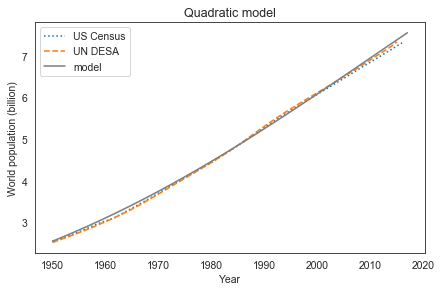

In [75]:
# testing the function
results = run_simulation(system, update_func_quad2)
plot_results(census, un, results, 'Quadratic model')